<a href="https://colab.research.google.com/github/aukabir/Machine_Learning_Project_2/blob/main/MLproject_2_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project
1. The objective of this project is to classify whether someone has diabetes or not.
2. Dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
3. The independent variables in this data set are :-'Age', 'gender','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes'.
4. The value of outcome variable 'diabetes' is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

---
* This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.
---



# Importing Libraries & Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import sklearn

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

plt.style.use(style='fivethirtyeight')
%matplotlib inline
print("Setup Complete")

Setup Complete


About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. ✈

Importing dataset from Google Drive

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataBank for ML study circle/diabetes_prediction_dataset.csv')
data.sample(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9519,Female,80.0,0,0,No Info,27.32,4.8,130,0
97974,Male,52.0,0,0,not current,27.19,6.1,200,0


# Data Cleaning
* Dropping duplicate values
* Checking NULL values
* Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.
* Outlier detection by visualization
* Outlier removal

## Duplicate & Null removal

As in this dataset, there is identification column, so it is not possible to detect duplicate rows.

In [ ]:
#check for missing values, count them and print the sum for every column
data.isnull().sum() #conclusion :- there are no null values in this dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Interpretation: There are no duplicate or Null values in the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Data_types, unique_values, value_counts of all columns
a = []
b = []
c = []
d = []
for col in data:
    a.append(col)
    b.append(data[col].dtype)
    c.append(data[col].nunique())
    d.append(data[col].value_counts())
pd.DataFrame({'column':a,'type': b ,'unique value' : c,'value_counts':d})

,column,type,unique value,value_counts
0,gender,object,3,Female 58552 Male 41430 Other 1...
1,age,float64,102,80.00 5621 51.00 1619 47.00 1574 48.0...
2,hypertension,int64,2,"0 92515 1 7485 Name: hypertension, dtyp..."
3,heart_disease,int64,2,"0 96058 1 3942 Name: heart_disease, dty..."
4,smoking_history,object,6,No Info 35816 never 35095 form...
5,bmi,float64,4247,27.32 25495 23.00 103 27.12 101 2...
6,HbA1c_level,float64,18,6.6 8540 5.7 8413 6.5 8362 5.8 832...
7,blood_glucose_level,int64,18,130 7794 159 7759 140 7732 160 771...
8,diabetes,int64,2,"0 91500 1 8500 Name: diabetes, dtype: i..."


## Checking binary features

In [ ]:
# Checking binary features (hypertension, heart_disease, and diabetes)
display(data.gender.value_counts())
print()
display(data.hypertension.value_counts())
print()
display(data.heart_disease.value_counts())
print()

Female    52956
Male      38266
Other        17
Name: gender, dtype: int64

0    85099
1     6140
Name: hypertension, dtype: int64

0    87879
1     3360
Name: heart_disease, dtype: int64

Interpretation: We checked the minimum value of binary columns is 0 and maximum is 1.

In [ ]:
# Remove 'Other' values from gender column
t = data['gender'] == 'Other'
data = data[~t]

## Outlier Detection

Boxplot

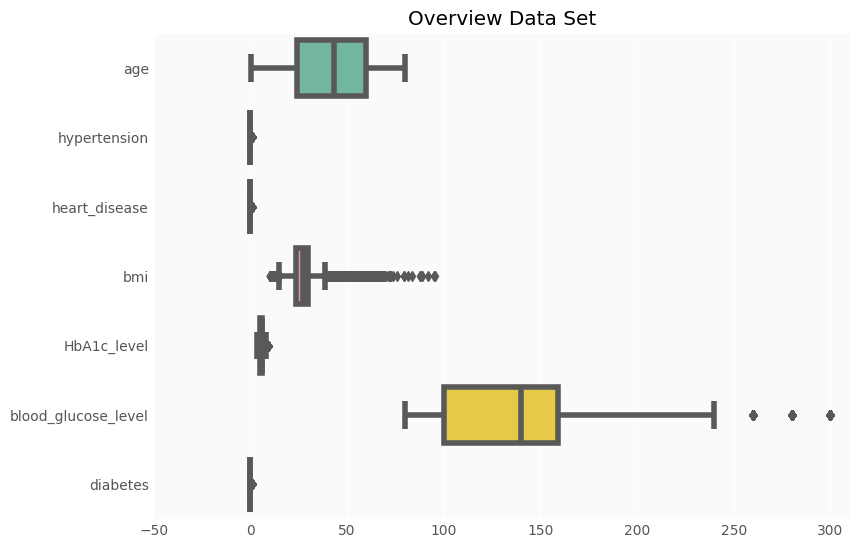

In [ ]:
#Boxplot
plt.style.use('ggplot') # Using ggplot2 style visuals
f, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-50, 310))
plt.title("Overview Data Set")
ax = sns.boxplot(data = data,
  orient = 'h',
  palette = 'Set2')
plt.savefig('1') 	#To save the figure

Old Shape:  (100000, 9)



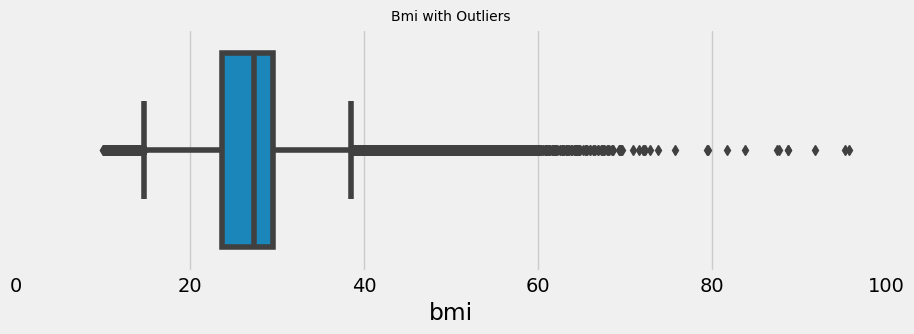

In [ ]:
#BoxPlot of Bmi
print("Old Shape: ", data.shape)
print()
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="bmi", data=data)
ax.set(xlim=(0, 100))
plt.title("Bmi with Outliers", fontsize=10)
plt.show()


New Shape:  (92897, 9)



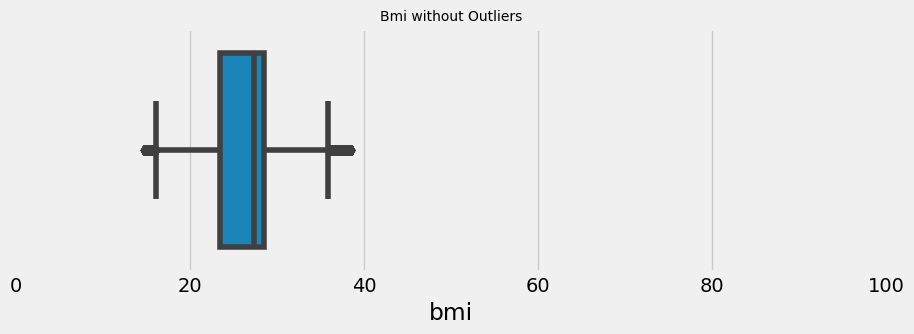

In [ ]:
# # Outlier removal of bmi (as we see we have many outliers from visualization, we want to remove it)
# 1. frist calculation IQR
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)

# 2. determine the upper and lower boundries :
upper_boundry = data['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['bmi'].quantile(0.25) - (IQR*1.5)

# 3. removing outliers :
data = data[data['bmi'] <= upper_boundry]
data = data[data['bmi'] >= lower_boundry]

print()
print("New Shape: ", data.shape)
print()

#Box plot of Bmi
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="bmi", data=data)
ax.set(xlim=(0, 100))
plt.title("Bmi without Outliers", fontsize=10)
plt.show()


New Shape:  (91222, 9)



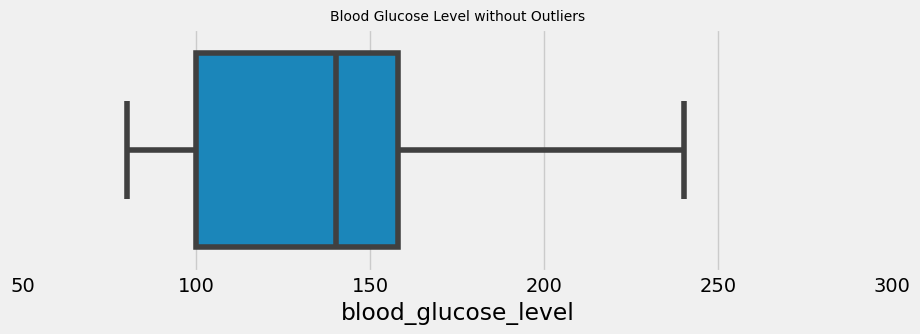

In [ ]:
# # Outlier removal of blood_glucose_level
# 1. frist calculation IQR
IQR = data['blood_glucose_level'].quantile(0.75) - data['blood_glucose_level'].quantile(0.25)

# 2. determine the upper and lower boundries :
upper_boundry = data['blood_glucose_level'].quantile(0.75) + (IQR*1.5)
lower_boundry = data['blood_glucose_level'].quantile(0.25) - (IQR*1.5)

# 3. removing outliers :
data = data[data['blood_glucose_level'] <= upper_boundry]
data = data[data['blood_glucose_level'] >= lower_boundry]

print()
print("New Shape: ", data.shape)
print()

#Box plot of Blood_glucose_level
plt.figure(figsize=(10, 3))
ax = sns.boxplot(x="blood_glucose_level", data=data)
ax.set(xlim=(50, 300))
plt.title("Blood Glucose Level without Outliers", fontsize=10)
plt.show()

In [ ]:
data.shape

(91222, 18)

<Axes: xlabel='blood_glucose_level'>

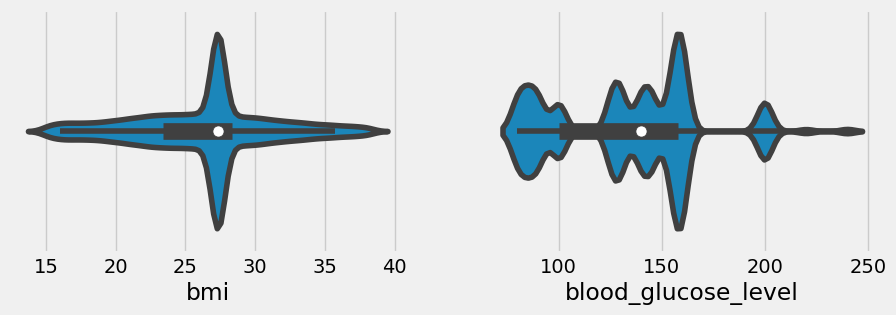

In [ ]:
#Boxplot & ViolinPlot of bmi:
plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
sns.violinplot(data = data, x = 'bmi')

plt.subplot(1,2,2);
sns.violinplot(data = data, x = 'blood_glucose_level')

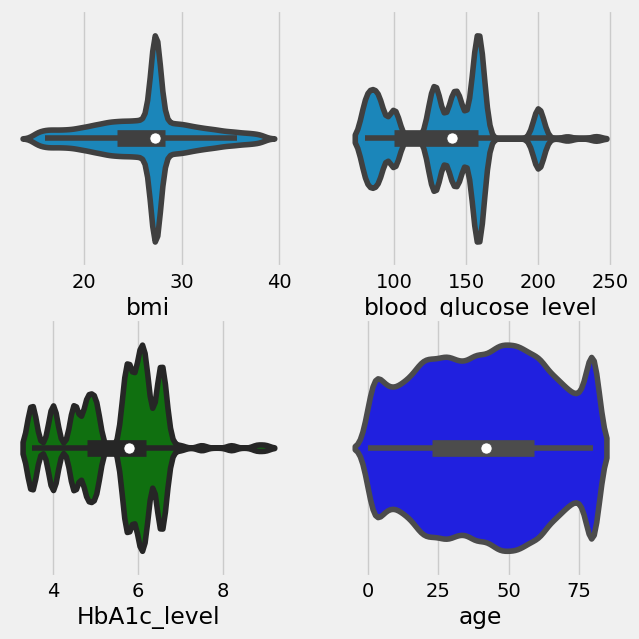

In [ ]:
#ViolinPlot of 4 features
plt.figure(figsize = [7,7]);

plt.subplot(2,2,1);
sns.violinplot(data = data, x = 'bmi');

plt.subplot(2,2,2);
sns.violinplot(data = data, x = 'blood_glucose_level');

plt.subplot(2,2,3);
sns.violinplot(data = data, x = 'HbA1c_level',color='green', marker='o');

plt.subplot(2,2,4);
sns.violinplot(data = data, x = 'age',color='blue', marker='o');

# Data Exploration

In [ ]:
display(data.columns) #learning about the columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# For Data Summarizing, group by 2 Categorical & 2 Numerical variable
data.groupby(['gender', 'smoking_history'])['age', 'bmi'].agg([np.mean, np.median])

age               bmi       
                             mean median       mean median
gender smoking_history                                    
Female current          43.072346   43.0  26.932587  27.32
       non-smoker       40.012535   39.0  25.920142  27.32
       past_smoker      50.543734   51.0  27.274188  27.32
Male   current          44.854357   45.0  27.549653  27.32
       non-smoker       36.082420   35.0  25.827350  27.32
       past_smoker      54.345560   57.0  28.055094  27.32

In [ ]:
# Cross tabulation of 2 Categorical variable with Total
pd.crosstab(data.gender,data.smoking_history,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

smoking_history,current,non-smoker,past_smoker,Total
gender,,,,
Female,4639,39277,9880,53796
Male,3985,26833,8283,39101
Total,8624,66110,18163,92897


In [ ]:
# groupby of 'gender' column
by_gen= data.groupby('gender')

# mean of every resting ecg type
by_gen.mean()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,
Female,42.192320,0.063411,0.024114,26.253676,5.471565,134.563109,0.050665
Male,40.780338,0.072702,0.054435,26.466322,5.511864,135.294935,0.069618
Other,30.705882,0.000000,0.000000,28.161176,5.429412,139.411765,0.000000


In [ ]:
# show how many column has 0 values and sum it
featureList = ['hypertension', 'heart_disease']
print(data[featureList].isin({0}).sum())

hypertension     85099
heart_disease    87879
dtype: int64


In [ ]:
# gender
data['gender'].value_counts()

Female    53796
Male      39101
Other        17
Name: gender, dtype: int64

# Data visualization

The visualization techniques provide imagery representation of Iris species and feature It is used to determine correlations between the X and Y variables (dependent and independent variables).
Now, we are going to visualize the dataset in two ways such as Boxplot, and pairwise joint plot distribution (scatter plot).

## Pie Plot

In [ ]:
# Gender visualization
num_var = list(data['gender'].value_counts().values)
labels = list(data['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))
print(num_var)
print(labels)

[53796, 39101]
['Female', 'Male']


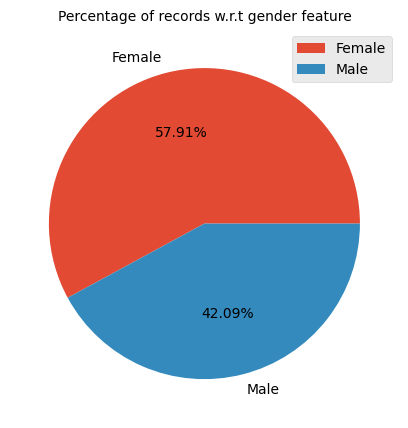

In [ ]:
plt.pie(count_dict.values(), labels = ['Female', 'Male'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t gender feature',fontsize=10);

In [ ]:
# percentage of patients with diabetes
num_var = list(data['diabetes'].value_counts().values)
labels = list(data['diabetes'].value_counts().index)
count_dict = dict(enumerate(num_var))
print(num_var)
print(labels)

[91482, 8500]
[0, 1]


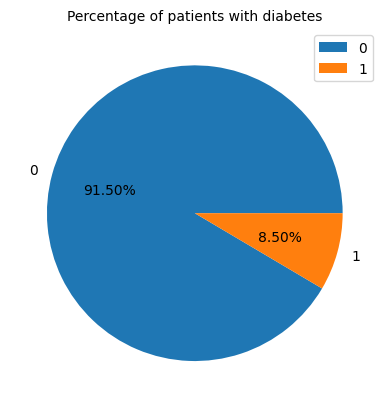

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.pie(num_var, labels = [0,1],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with diabetes', fontsize=10);

sns.set(font_scale=0.8)	#To fix the font size of the figure title
#plt.title('Correlation with Diabetes')	#To write the figure title
plt.savefig('5') 	#To save the figure
plt.show()

sns.set_style("white")
sns.set_palette("summer_r")
sns.despine()

## Density Plot

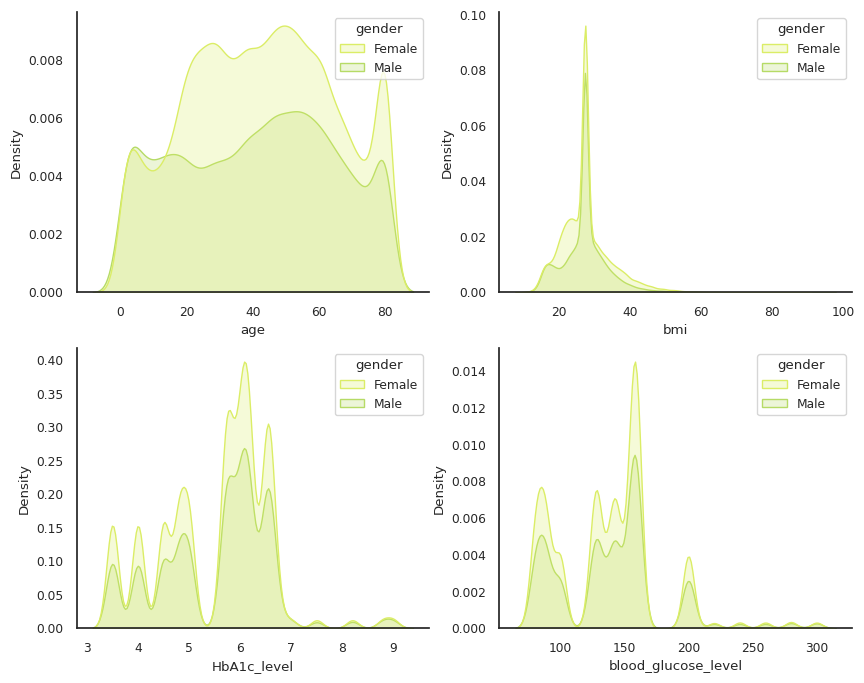

In [ ]:
# kernel density estimation (KDE) plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the density plot and histogram for each feature
sns.kdeplot(ax=axs[0, 0], data=data, x="age", fill=True, hue='gender')
sns.kdeplot(ax=axs[0, 1], data=data, x="bmi", fill=True, hue='gender')
sns.kdeplot(ax=axs[1, 0], data=data, x="HbA1c_level", fill=True, hue='gender')
sns.kdeplot(ax=axs[1, 1], data=data, x="blood_glucose_level", fill=True, hue='gender')
sns.set_style("white")

sns.set_palette("bright")
sns.despine() #To remove plot boundaries
# Add titles to the subplots
#axs[0, 0].set_title("Age")
#axs[0, 1].set_title("Bmi")
#axs[1, 0].set_title("HbA1c level")
#axs[1, 1].set_title("blood_glucose_level")

# Display the plots
plt.show()

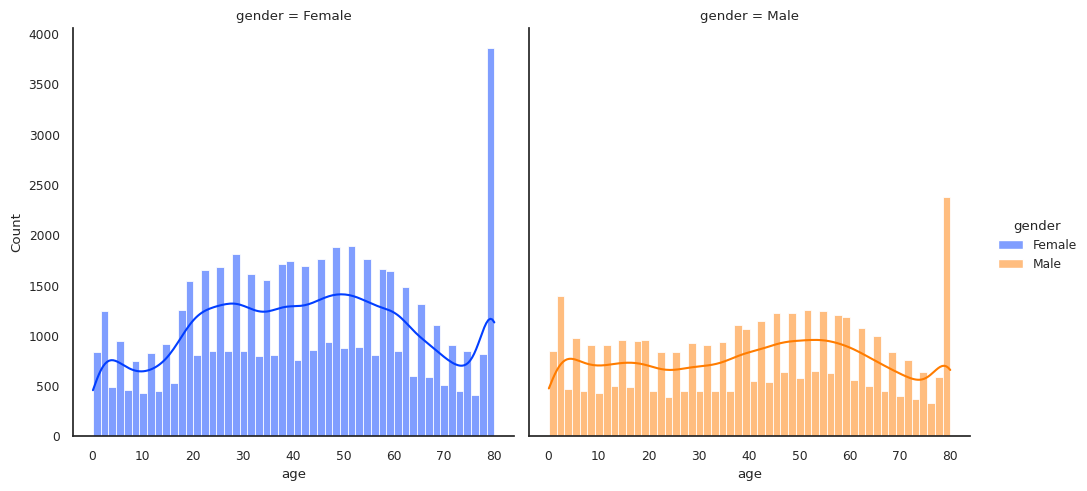

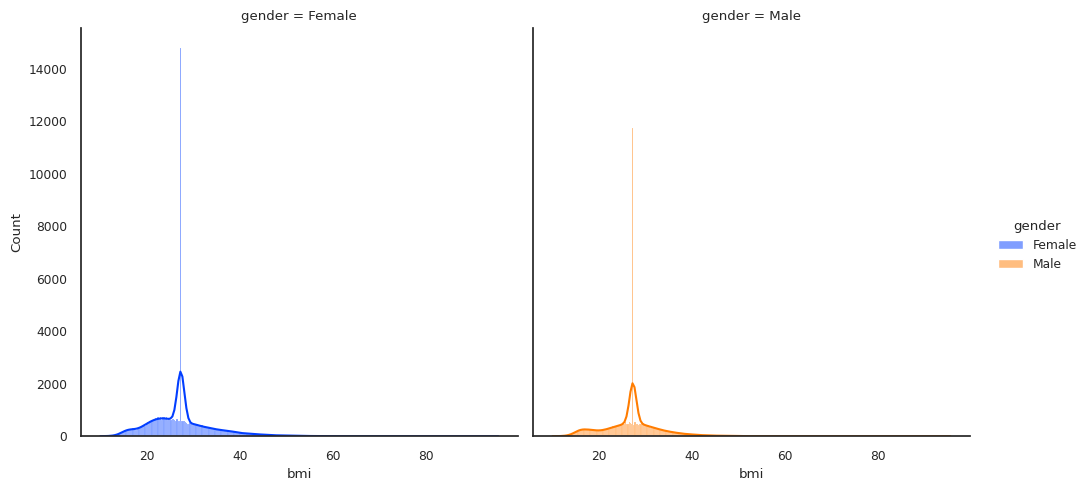

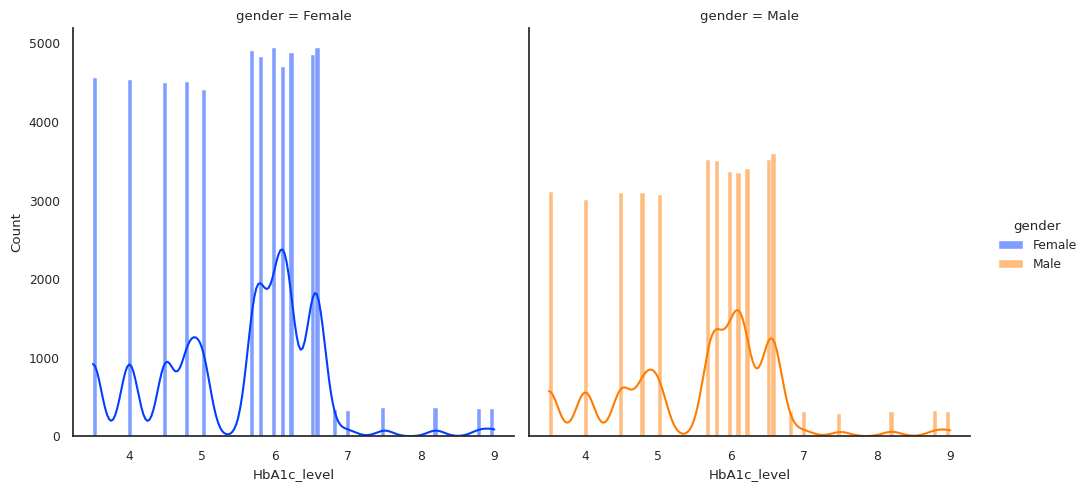

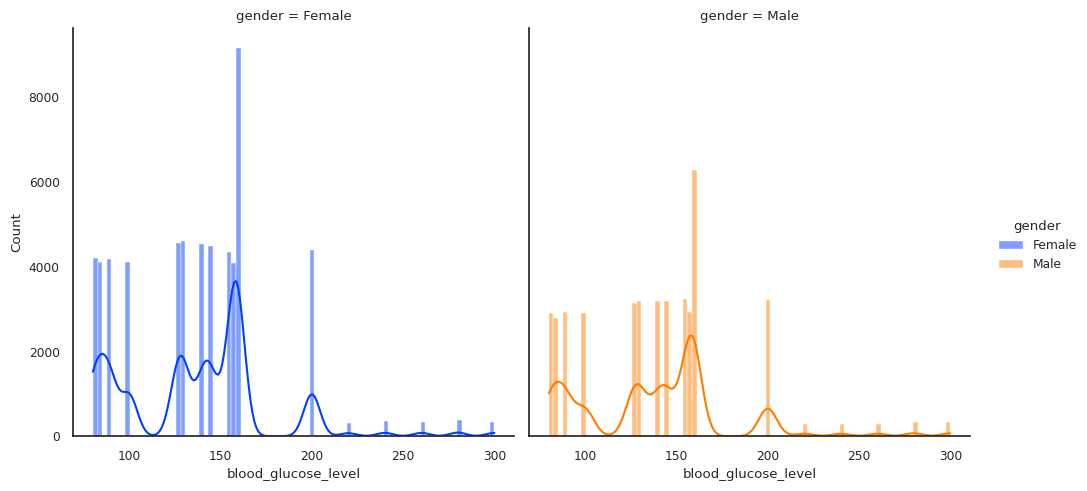

In [ ]:
# Distribution Plots by gender
sns.displot(data = data, x='age',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='bmi',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='HbA1c_level',hue='gender',col="gender",aspect=1,kde=True)
sns.displot(data = data, x='blood_glucose_level',hue='gender',col="gender",aspect=1,kde=True)
sns.set_style("white")

sns.set_palette("bright")
sns.despine()

## Scatter plot

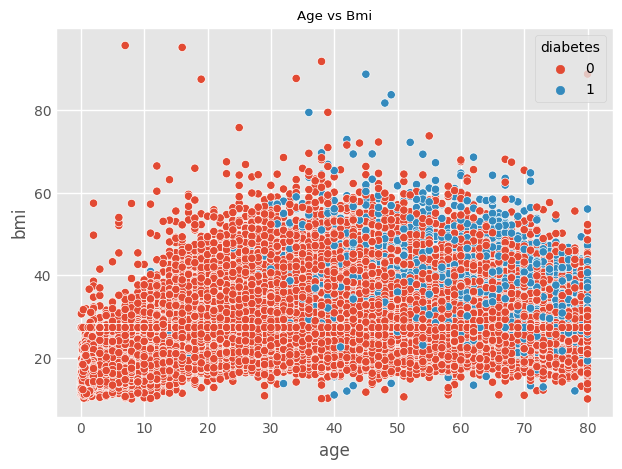

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
ax= sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
plt.title('Age vs Bmi')
plt.show()

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'weight_type',
       'initial_diagnosis', 'sugar_test', 'diabetes'],
      dtype='object')

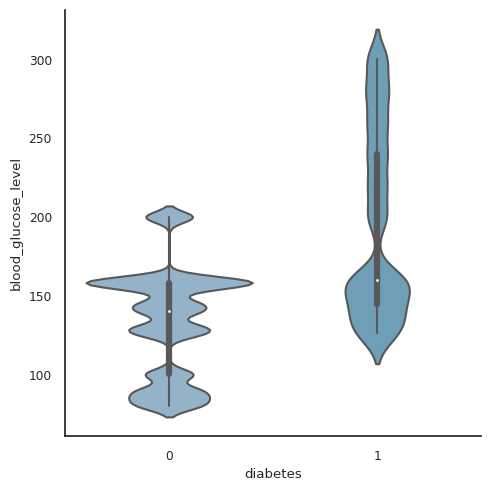

In [ ]:
sns.catplot(x='diabetes',
            y='blood_glucose_level',
            data=data,
            kind='violin');

sns.set_style("white")
sns.set_palette("bright")
sns.despine()

## Heatmap

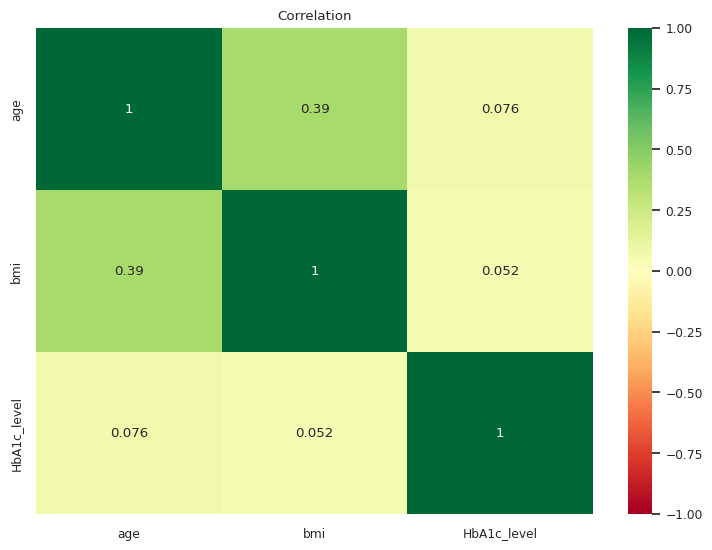

In [ ]:
#To check correlation within numerical features
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes('float64').corr(),annot=True,cmap="RdYlGn",vmin = -1, vmax = 1)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation')
plt.show()

<Axes: >

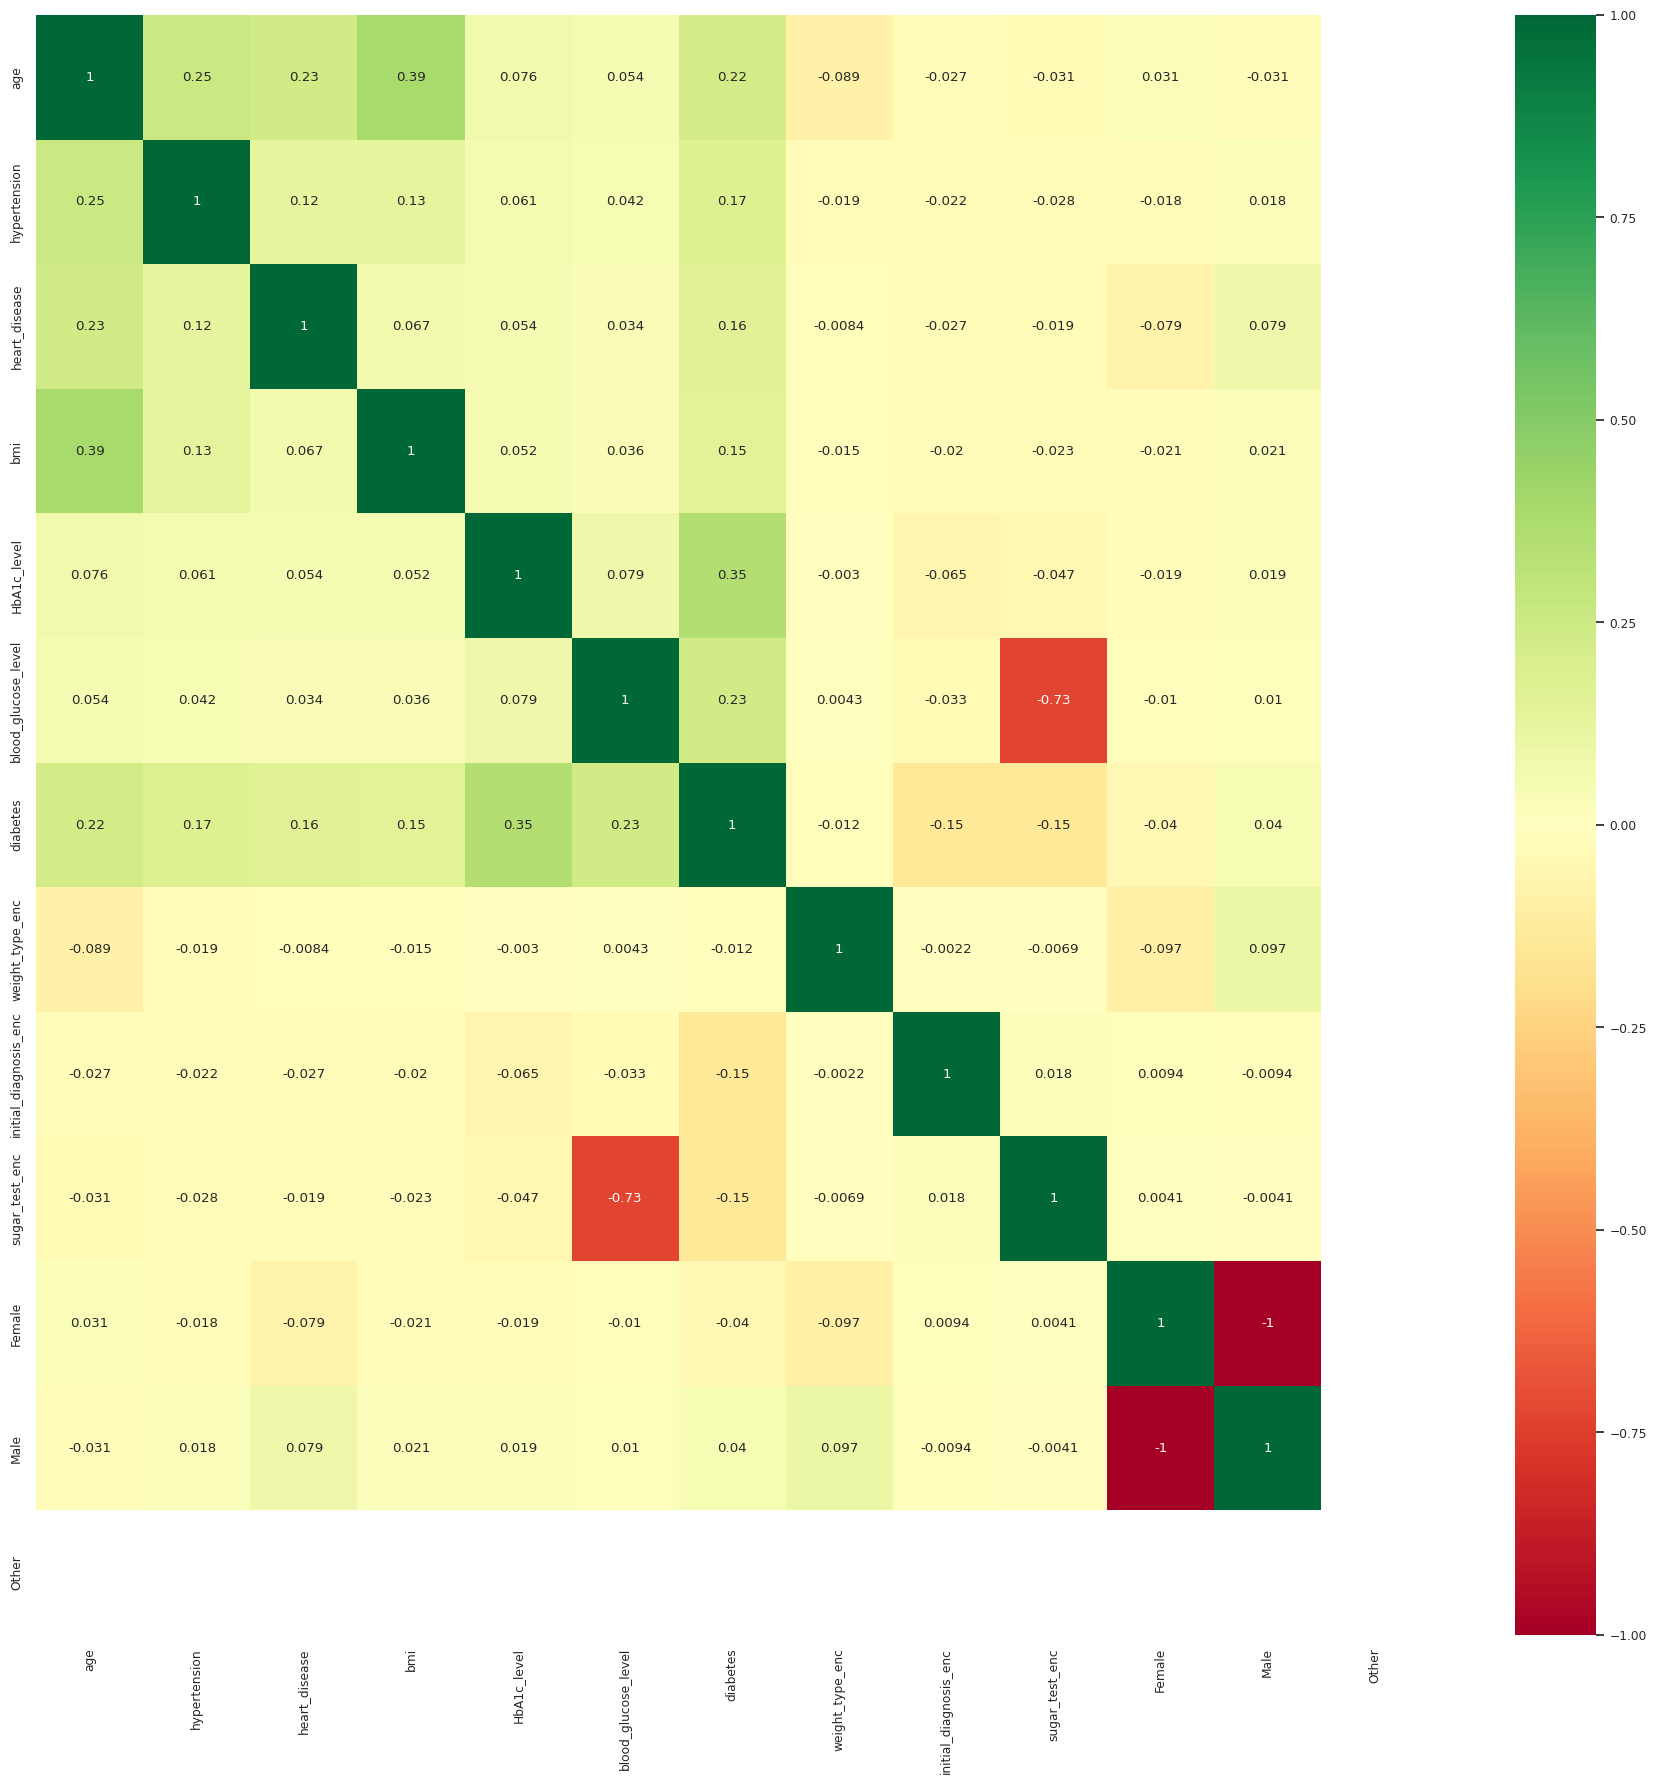

In [ ]:
## Correlation within all features
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

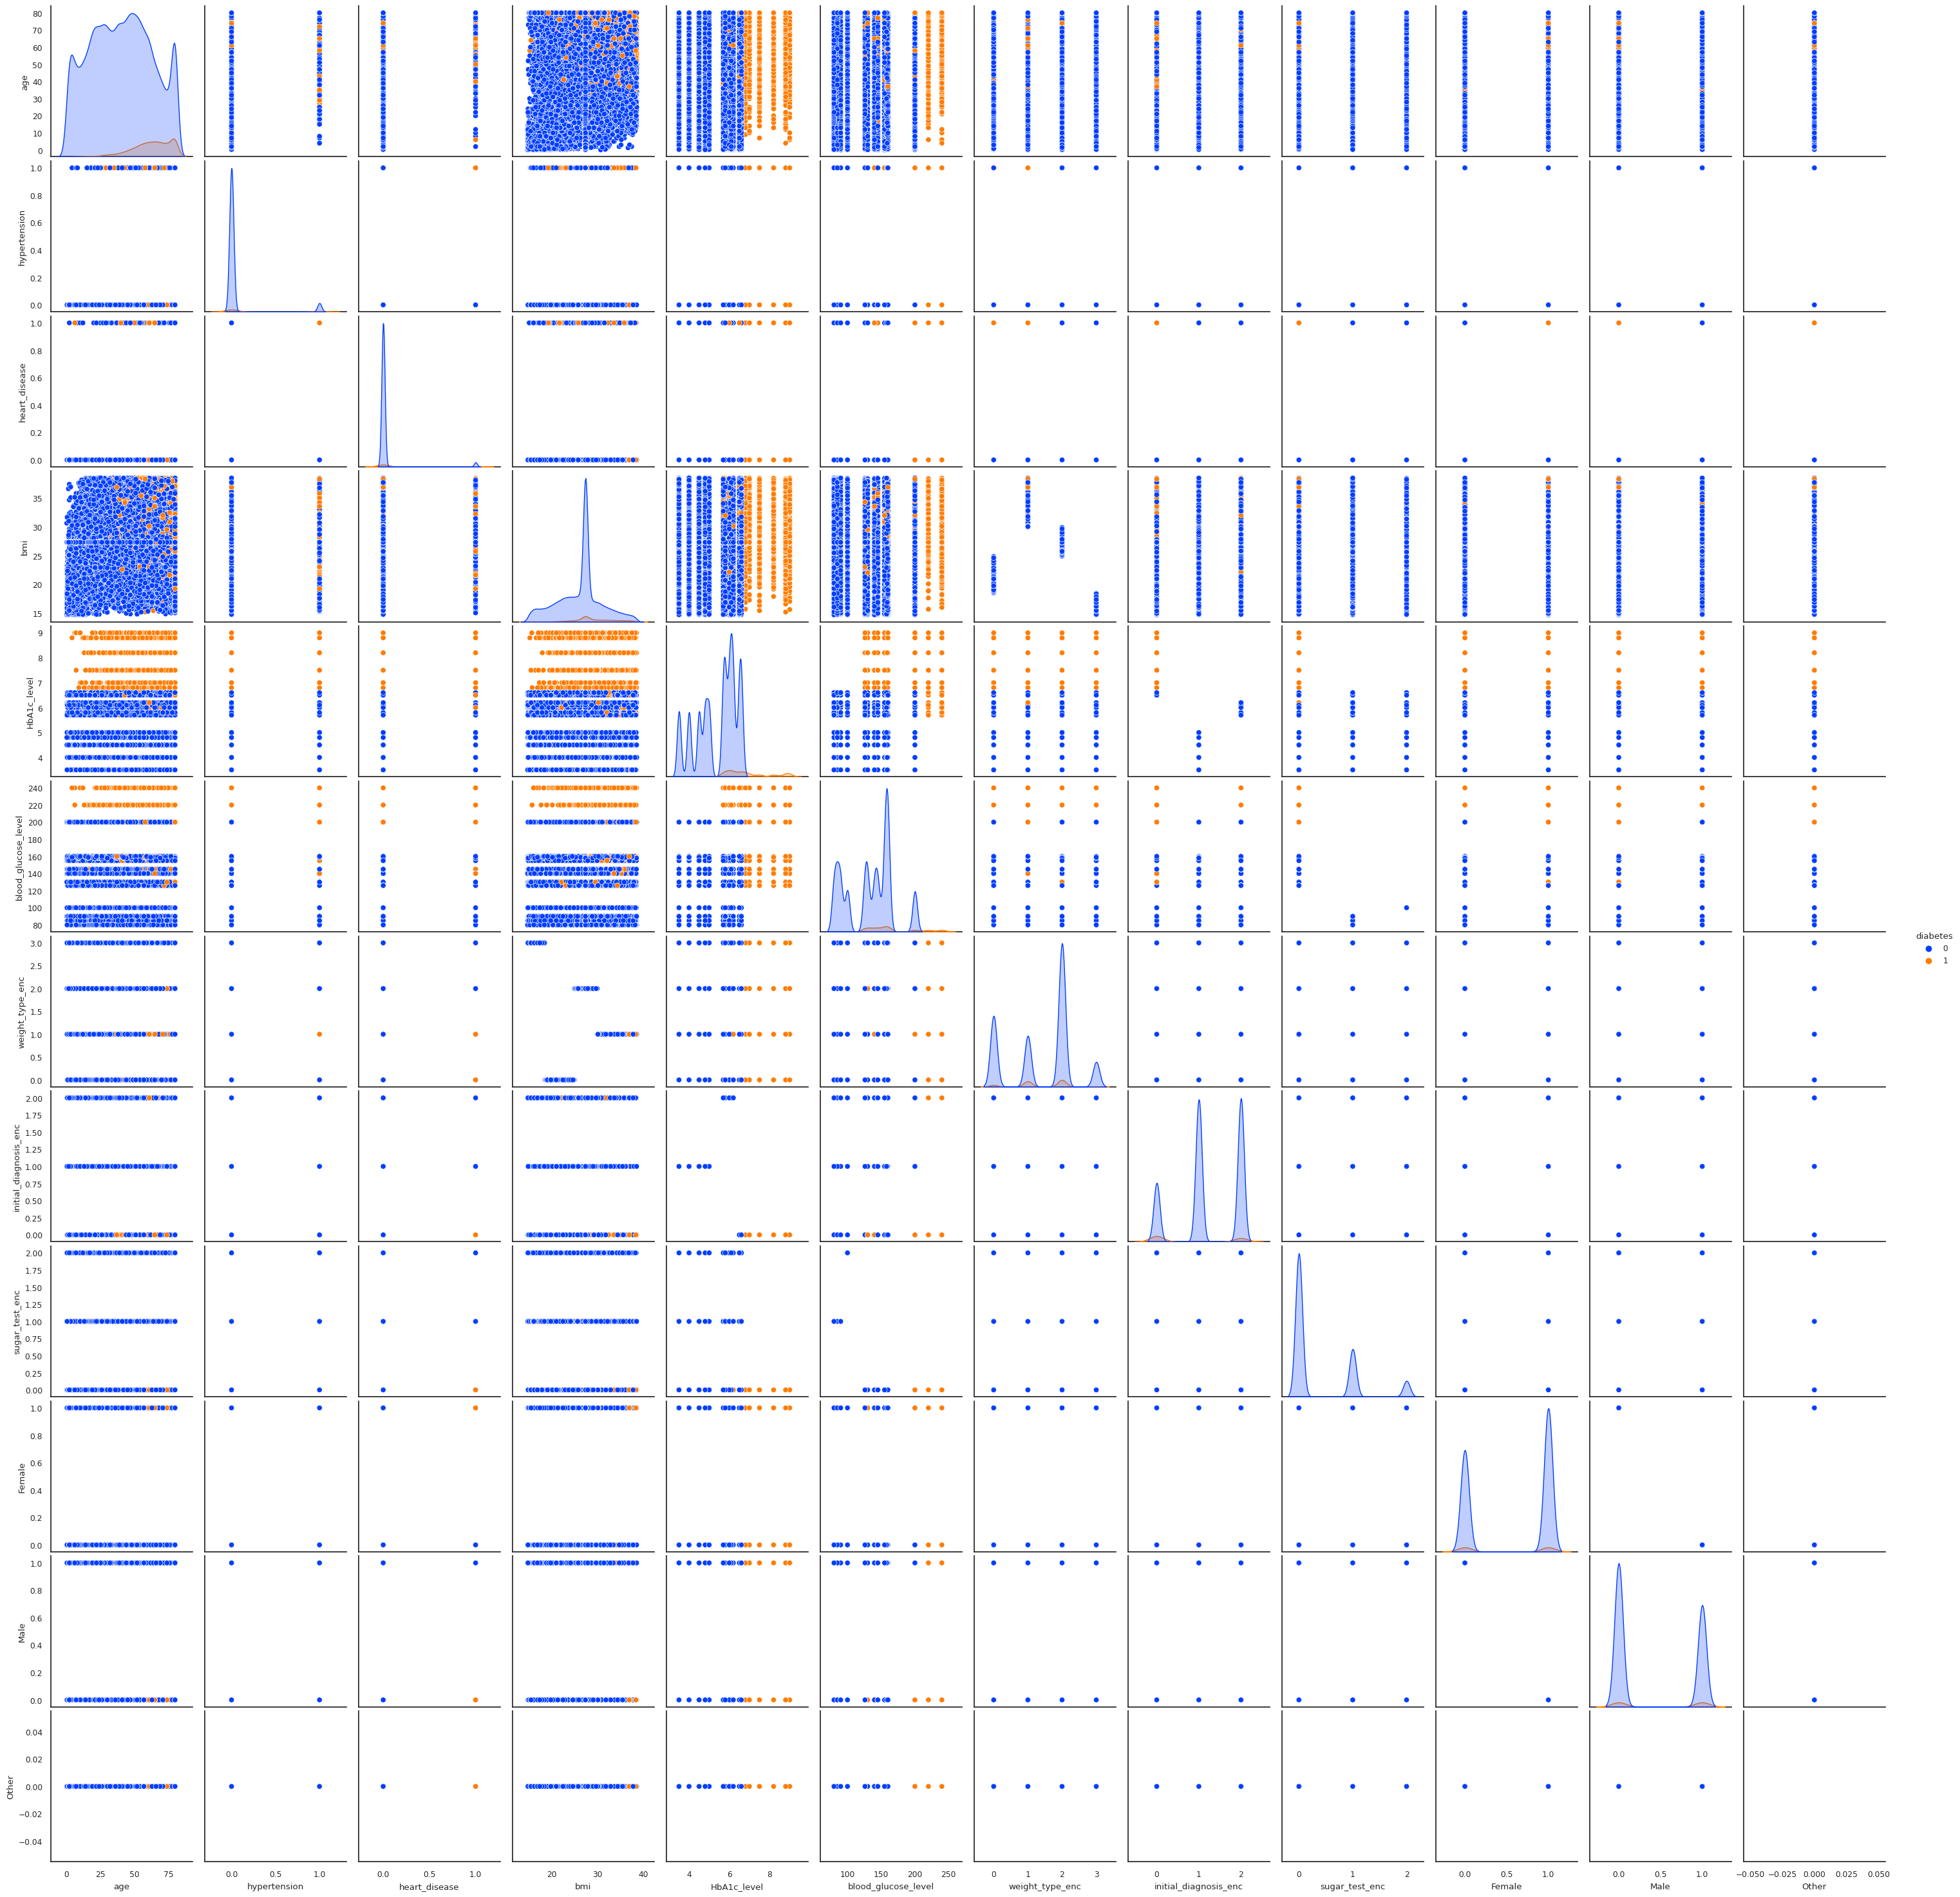

In [ ]:
# Pairplot
sns.pairplot(data, hue='diabetes')

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'weight_type',
       'initial_diagnosis', 'sugar_test'],
      dtype='object')

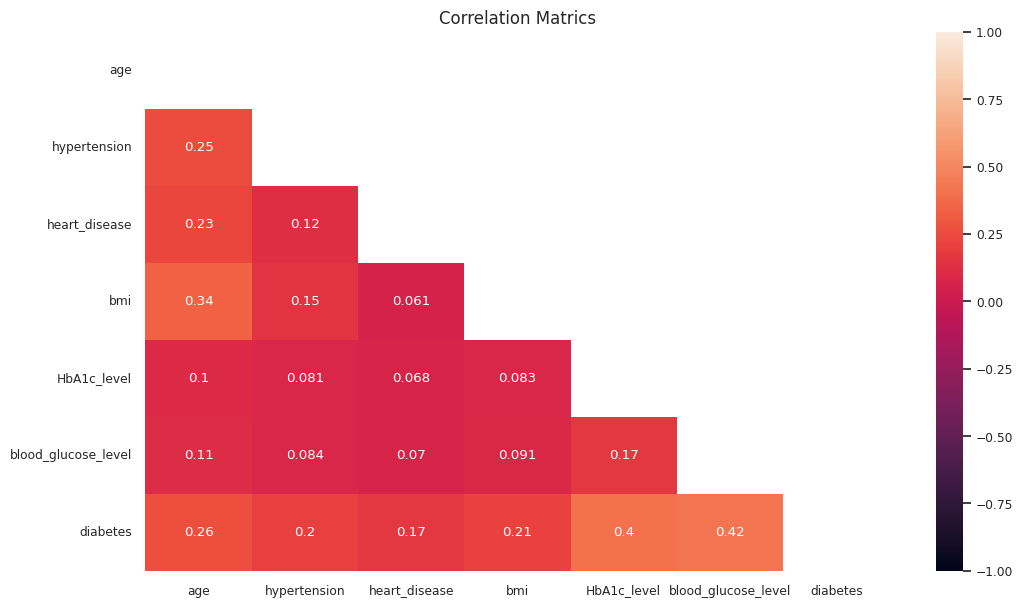

In [ ]:
#To check correlation within all columns excluded one column
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.drop(['initial_diagnosis'],axis=1).corr(), annot = True, vmin = -1, vmax = 1,mask=mask)

sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation Matrics')
plt.show()

<Axes: >

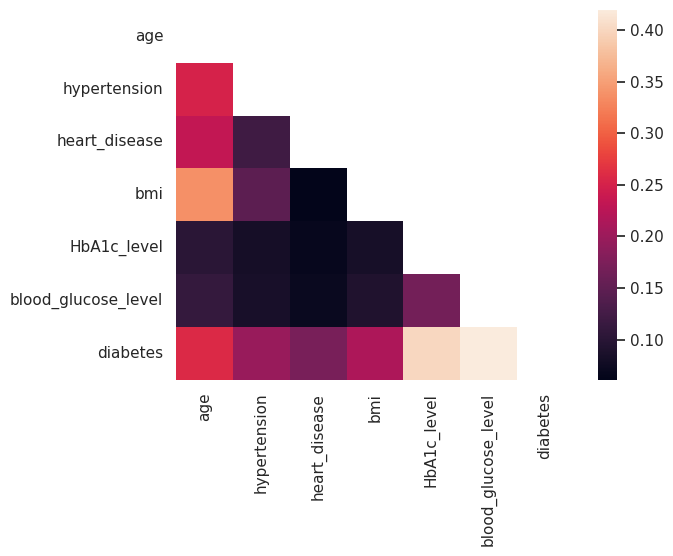

In [ ]:
mask = np.triu(np.ones_like(data.corr()))
# plotting a triangle correlation heatmap
sns.heatmap(data.corr(), mask=mask)


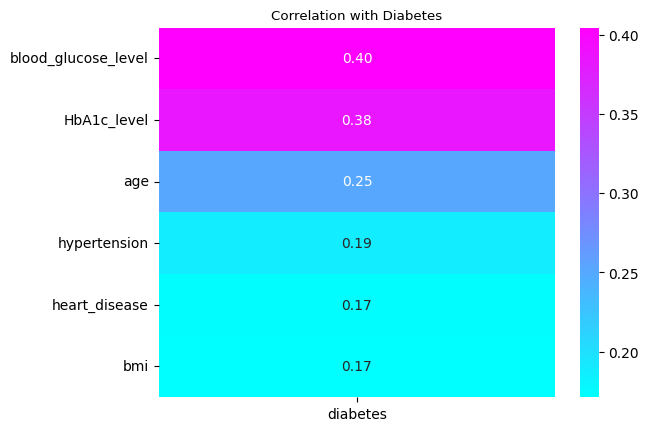

In [ ]:
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="cool", annot=True, fmt='.2f')

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("bright")
plt.title('Correlation with Diabetes')
plt.show()

# Feature Engineering

### Recategorize Smoking_history



In [ ]:
# Recategorize
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(data['smoking_history'].value_counts())

non-smoker     65175
past_smoker    17623
current         8424
Name: smoking_history, dtype: int64


### bmi & diabetes

* Body mass index is a measure of body fat based on height and weight that applies to adult men and women.
* it is the weight in kilograms divided by height in meters squared


In [ ]:
#bmi counts with %
counts = data.bmi.value_counts()
percs = data.bmi.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
27.32,25495,0.274394
23.00,103,0.001109
27.12,101,0.001087
27.80,100,0.001076
24.96,100,0.001076
...,...,...
37.53,2,0.000022
37.72,2,0.000022
38.29,2,0.000022
37.89,1,0.000011


If BMI	=< 18.5	weight_type is Underweight

If BMI 18.5 – 24.9	weight_type is Normal

If BMI 25 – 29.9	weight_type is Overweight

If BMI >= 30	weight_type is Obesity

Reference: https://www.cdc.gov/diabetes/basics/getting-tested.html

**New Feature 'weight_type'**

In [ ]:
#New Categorical feature 'weight_type' a.c.to bmi values
weight_type = []
for value in data['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')
    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')
    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')
    elif (value > 29.9):
        weight_type.append('obesity')
data['weight_type'] = weight_type

### HbA1c_level & diabetes

* A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

* we will create a new feature bassed on the value of (HbA1C)

In [ ]:
# Hemoglobin level counts with %
counts = data.HbA1c_level.value_counts()
percs = data.HbA1c_level.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
6.6,7935,0.085402
5.7,7831,0.084282
6.5,7805,0.084002
5.8,7752,0.083432
6.2,7722,0.083109
6.0,7695,0.082819
6.1,7471,0.080408
3.5,7184,0.077319
4.8,7117,0.076598
4.5,7097,0.076382


**New Feature initial_diagnosis'**

If HbA1c level	< 5.7 initial diagnosis Normal

If HbA1c level	5.7 - 6.4 initial diagnosis Prediabetes

If HbA1c level	>= 6.5 initial diagnosis Diabetes

Reference: https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [ ]:
#Creating new Categorical feature (initial_diagnosis) based on Numerical feature (HbA1c level)
initial_diagnosis = []
for value in data['HbA1c_level']:
    if value < 5.7:
        initial_diagnosis.append('normal')
    elif (5.7 <= value) and (value <= 6.4):
        initial_diagnosis.append('prediabetes')
    elif (value >= 6.5):
        initial_diagnosis.append('diabetes')

data['initial_diagnosis'] = initial_diagnosis

### blood_glucose_level & diabetes


* If blood_glucose_level	 =< 99	sugar_test is normal
* If blood_glucose_level	 100 – 125	sugar_test is Prediabetes
*If blood_glucose_level	 >= 126	sugar_test is Diabetes

Resources :

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test
https://www.cdc.gov/diabetes/basics/getting-tested.html

In [ ]:
# blood_glucose_level counts with %
counts = data.blood_glucose_level.value_counts()
percs = data.blood_glucose_level.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
130,7794,0.077954
159,7756,0.077574
140,7730,0.077314
160,7708,0.077094
126,7700,0.077014
145,7679,0.076804
200,7599,0.076004
155,7575,0.075764
90,7110,0.071113
80,7105,0.071063


In [ ]:
#New Categorical feature 'sugar_test' a.c.to blood_glucose_level values
sugar_test = []

for value in data['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')

    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')

    elif (value > 125):
        sugar_test.append('diabetes')

data['sugar_test'] = sugar_test

In [ ]:
data['sugar_test'].value_counts()

diabetes       71842
normal         21115
prediabetes     7025
Name: sugar_test, dtype: int64

In [ ]:
#Crosstab of sugar_test and diabetes
pd.crosstab(data.sugar_test,data.diabetes,margins=True, margins_name="Total", normalize = False).style.background_gradient(cmap='summer_r')

diabetes,0,1,Total
sugar_test,,,
diabetes,63342,8500,71842
normal,21115,0,21115
prediabetes,7025,0,7025
Total,91482,8500,99982


# Preprocessing for ML Models

In [ ]:
# Check the unique values of all column
n = data.nunique(axis=0)
print("No.of unique values in each column:\n", n)

No.of unique values in each column:
 gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           3
bmi                    2380
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
weight_type               4
initial_diagnosis         3
sugar_test                3
dtype: int64


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'weight_type',
       'initial_diagnosis', 'sugar_test'],
      dtype='object')

In [ ]:
#To check data types & unique values
d = []
u = []
t = []
for col in data:
    d.append(col)
    u.append(data[col].nunique())
    t.append(data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,gender,object,2
1,age,float64,102
2,hypertension,int64,2
3,heart_disease,int64,2
4,smoking_history,object,3
5,bmi,float64,2380
6,HbA1c_level,float64,18
7,blood_glucose_level,int64,18
8,diabetes,int64,2
9,weight_type,object,4


In [ ]:
# Move last Column to First Column
data = data.reindex(columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'weight_type',
       'initial_diagnosis', 'sugar_test', 'diabetes'])


In [ ]:
data.sample(4)

### Label Encoding

In [ ]:
# Separate Numerical & Categorical columns
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'smoking_history', 'weight_type', 'initial_diagnosis',
       'sugar_test'],
      dtype='object')
Numerical Variables:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [ ]:
data.weight_type.value_counts()

overweight     45760
obesity        23875
normal         21828
underweight     8519
Name: weight_type, dtype: int64

In [ ]:
#Performing (ordinal) feature mapping
#data['weight_type'] = data['weight_type'].replace(('underweight','normal','overweight','obesity'),(1,2,3,4))

In [ ]:
## Categorical (Ordinal) feature encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['weight_type_enc']=le.fit_transform(data['weight_type'])
data['initial_diagnosis_enc']=le.fit_transform(data['initial_diagnosis'])
data['sugar_test_enc']=le.fit_transform(data['sugar_test'])

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,weight_type,initial_diagnosis,sugar_test
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0,overweight,diabetes,diabetes
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0,overweight,diabetes,normal
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0,overweight,prediabetes,diabetes
3,Female,36.0,0,0,current,23.45,5.0,155,0,normal,normal,diabetes
4,Male,76.0,1,1,current,20.14,4.8,155,0,normal,normal,diabetes


In [ ]:
data['sugar_test_enc'].value_counts()

0    64824
1    19806
2     6592
Name: sugar_test_enc, dtype: int64

### Dummy Encoding

In [ ]:
## Categorical (Nominal) feature e.g; 'gender', 'smoking_history'
#One hot encoding
x=pd.get_dummies(data['gender'])
data=pd.concat([data,x],axis=1)

In [ ]:
#Drop object columns
df = data.drop(['gender','smoking_history','weight_type','initial_diagnosis','sugar_test'],axis=1)

In [ ]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'weight_type_enc',
       'initial_diagnosis_enc', 'sugar_test_enc', 'Female', 'Male'],
      dtype='object')

In [ ]:
df1 = df.reindex(columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level','weight_type_enc',
       'initial_diagnosis_enc', 'sugar_test_enc', 'Female', 'Male','diabetes'])

In [ ]:
df1.columns = df1.columns.str.lower()

In [ ]:
df1.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level',
       'blood_glucose_level', 'weight_type_enc', 'initial_diagnosis_enc',
       'sugar_test_enc', 'female', 'male', 'diabetes'],
      dtype='object')

## Feature selection

In [ ]:
# Correlation matrix of label with features
corr = df1.corr()['diabetes'][df1.corr()['diabetes'] < 1].abs().sort_values(ascending=False)
corr

hba1c_level              0.348913
blood_glucose_level      0.227840
age                      0.224227
hypertension             0.172502
heart_disease            0.157104
bmi                      0.149421
sugar_test_enc           0.147270
initial_diagnosis_enc    0.147064
male                     0.039853
female                   0.039756
weight_type_enc          0.011782
Name: diabetes, dtype: float64

*  +1.0	Perfect positive + association
*  +0.8 to 1.0	Very strong + association
*  +0.6 to 0.8	Strong + association
*  +0.4 to 0.6	Moderate + association
*  +0.2 to 0.4	Weak + association
*  0.0 to +0.2	Very weak + or no association

In [ ]:
df1.dtypes

age                      float64
hypertension               int64
heart_disease              int64
bmi                      float64
hba1c_level              float64
blood_glucose_level        int64
weight_type_enc            int64
initial_diagnosis_enc      int64
sugar_test_enc             int64
female                     uint8
male                       uint8
diabetes                   int64
dtype: object

In [ ]:
#Outlier Observation Analysis
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in data:

    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

<Axes: >

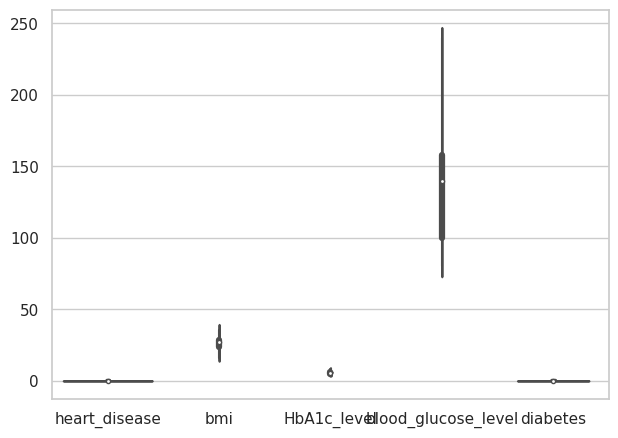

In [ ]:
sns.violinplot(data=data.iloc[:,3:10])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Pull out a specific subset of networks
used_networks = ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level',
       'blood_glucose_level', 'weight_type_enc', 'initial_diagnosis_enc',
       'sugar_test_enc', 'female', 'male', 'diabetes']
used_columns = (df1.columns.get_level_values("sugar_test_enc")
                          .astype(int64)
                          .isin(used_networks))

# Compute the correlation matrix and average over networks
corr_df = df1.corr().groupby(level="sugar_test_enc").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## Checking label imbalance

In [ ]:
# Percentage of label values
counts = df1.diabetes.value_counts()
percs = df1.diabetes.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
0,85875,0.941385
1,5347,0.058615


The dataset is imbalanced (with 8% positive cases for diabetes and 92% negative cases), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class. For this purpose, the Synthetic Minority Over-sampling Technique (SMOTE) is used, which generates synthetic samples for the minority class.

In [ ]:
df1.shape

(91239, 12)

In [ ]:
#lets extract features and label column
X=df1.drop(columns=['diabetes'])
y=df1['diabetes']

## Splitting dataset

In [ ]:
#lets extract features and label column
X=df1.drop(columns=['diabetes'])
y=df1['diabetes']

In [ ]:
X.head()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,weight_type_enc,initial_diagnosis_enc,sugar_test_enc,female,male
0,80.0,0,1,25.19,6.6,140,2,0,0,1,0
1,54.0,0,0,27.32,6.6,80,2,0,1,1,0
2,28.0,0,0,27.32,5.7,158,2,2,0,0,1
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [ ]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (72991, 11)
X_test shape: (18248, 11)
Y_train shape: (72991,)
Y_test shape: (18248,)


## Scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# numerical features
num_cols = ['age','bmi','blood_glucose_level']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])

    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,63867.0,1.691053e-17,1.000008,-1.836223,-0.822036,0.018695,0.770928,1.700158
hypertension,63867.0,6.698295e-02,0.249994,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,63867.0,3.635680e-02,0.187178,0.000000,0.000000,0.000000,0.000000,1.000000
bmi,63867.0,5.785182e-18,1.000008,-2.373117,-0.602673,0.204862,0.403168,2.490493
hba1c_level,63867.0,5.489423e+00,1.045605,3.500000,4.800000,5.800000,6.200000,9.000000
blood_glucose_level,63867.0,-3.698066e-16,1.000008,-1.549139,-0.984952,0.143422,0.651191,2.964358
weight_type_enc,63867.0,1.420076e+00,0.939890,0.000000,1.000000,2.000000,2.000000,3.000000
initial_diagnosis_enc,63867.0,1.215870e+00,0.751316,0.000000,1.000000,1.000000,2.000000,2.000000
sugar_test_enc,63867.0,3.633645e-01,0.614168,0.000000,0.000000,0.000000,1.000000,2.000000
female,63867.0,5.809103e-01,0.493414,0.000000,0.000000,1.000000,1.000000,1.000000


# Data Modelling

## Logistic Regression

In [ ]:
###Classification Models
##Logistic Regression
#Training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     28277
           1       0.57      0.85      0.69      1718

    accuracy                           0.96     29995
   macro avg       0.78      0.91      0.83     29995
weighted avg       0.97      0.96      0.96     29995

Accuracy =  95.54  %


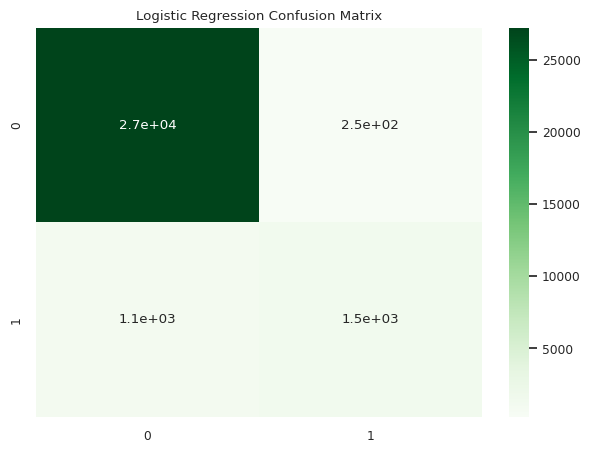

In [ ]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = lr.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',lr_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.title('Logistic Regression Confusion Matrix');

## K-Nearest-Neighbour

In [ ]:
###K-Nearest-Neighbour
##Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     28153
           1       0.58      0.80      0.67      1842

    accuracy                           0.95     29995
   macro avg       0.78      0.88      0.82     29995
weighted avg       0.96      0.95      0.96     29995

Accuracy =  95.2  %


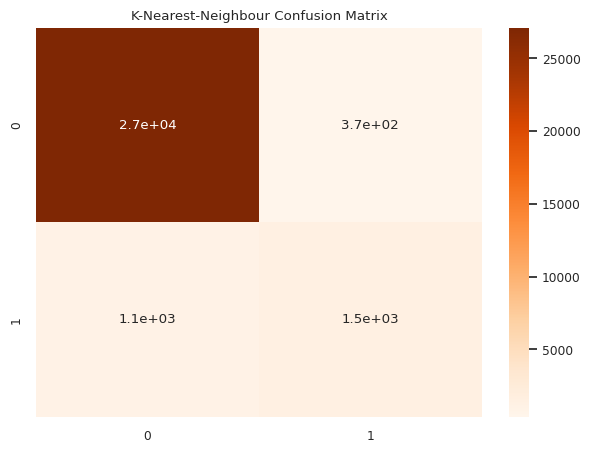

In [ ]:
#Evaluating the model
y_pred = knn.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

knn_train_acc = round(accuracy_score(y_train,knn.predict(X_train))*100,2)
knn_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ',knn_test_acc ,' %')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Oranges')
plt.title('K-Nearest-Neighbour Confusion Matrix');

## Naive Bayes

In [ ]:
##Naive Bayes
#Training the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82     19029
           1       0.98      0.23      0.37     10966

    accuracy                           0.72     29995
   macro avg       0.84      0.61      0.59     29995
weighted avg       0.80      0.72      0.65     29995

Accuracy =  71.59  %


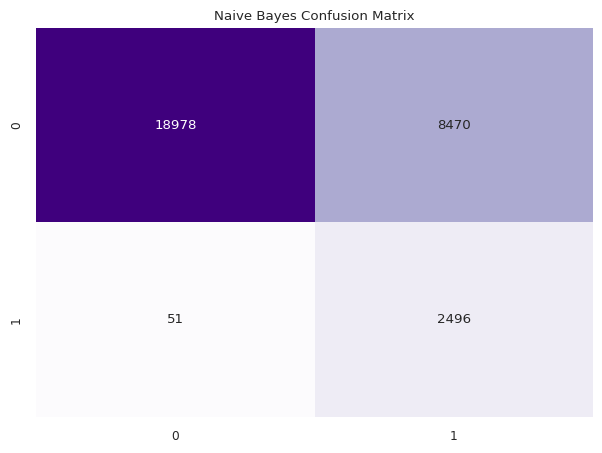

In [ ]:
#Evaluating the model
y_pred = nb.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Purples', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');

## Decision Tree

In [ ]:
##Decision Tree
#Training the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     27337
           1       0.74      0.71      0.72      2658

    accuracy                           0.95     29995
   macro avg       0.85      0.84      0.85     29995
weighted avg       0.95      0.95      0.95     29995

Accuracy =  95.16  %


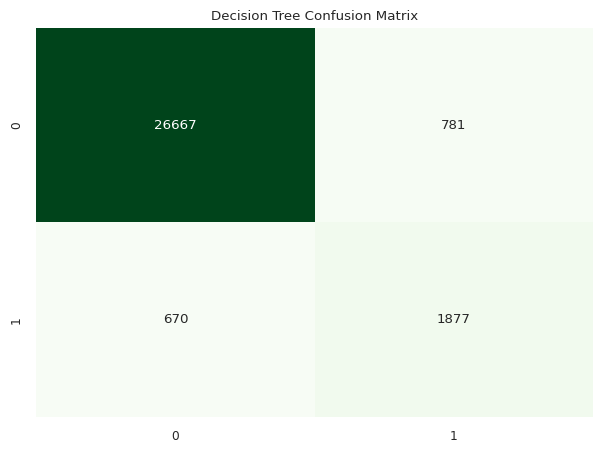

In [ ]:
#Evaluating the model
y_pred = tree.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
tree_train_acc = round(accuracy_score(y_train,tree.predict(X_train))*100,2)
tree_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , tree_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens', cbar=False,)
plt.title('Decision Tree Confusion Matrix');

##Random Forest

In [ ]:
##Random Forest
#Training the model
from sklearn.ensemble import RandomForestClassifier
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28021
           1       0.70      0.91      0.79      1974

    accuracy                           0.97     29995
   macro avg       0.85      0.94      0.89     29995
weighted avg       0.97      0.97      0.97     29995

Accuracy =  96.85  %


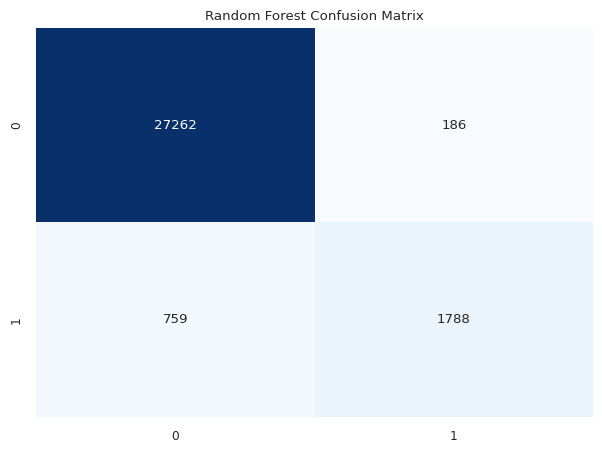

In [ ]:
#Evaluating the model
y_pred = rdm_frst.predict(X_test)

from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
classification_report(y_pred,y_test)
print(classification_report(y_pred,y_test))

cm = confusion_matrix(y_test, y_pred)
rdm_train_acc = round(accuracy_score(y_train,rdm_frst.predict(X_train))*100,2)
rdm_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy = ' , rdm_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Random Forest Confusion Matrix');

#Comparing Classification Models

In [ ]:
###Comparing Classification Models
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Gaussian Naive Bayes','Decision Tree',
        'Random Forest'],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,nb_train_acc,tree_train_acc,rdm_train_acc],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc
    ]})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
3,Decision Tree,99.84,95.16
4,Random Forest,99.84,96.85
1,K Nearest Neighbors,96.98,95.20
0,Logistic Regression,95.47,95.54
2,Gaussian Naive Bayes,71.68,71.59


In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Oranges_r')

,Model,Training Accuracy,Model Accuracy Score
4,Random Forest,99.840000,96.850000
0,Logistic Regression,95.470000,95.540000
1,K Nearest Neighbors,96.980000,95.200000
3,Decision Tree,99.840000,95.160000
2,Gaussian Naive Bayes,71.680000,71.590000


# 5. statistical test

In [ ]:
data.columns

In [ ]:
# Sort the data
data.sort_values(by=['age','HbA1c_level', 'blood_glucose_level'], inplace=True)

In [ ]:
data.head(10)